# Data Analytics & Machine Learning Using The Titanic Dataset

### Setting Up
### Loading the Required Libraries

I import the necessary libraries needed for the analysis and Machine Learning in this section

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tarfile
import urllib
from zipfile import ZipFile

In [5]:
file_name = 'titanic-dataset.zip'
with ZipFile(file_name, 'r') as file:
    file.extractall()

In [7]:
df = pd.read_csv('titanic_train.csv')
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [8]:
df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


This dataset contains 850 enteries with 15 attributes. A number of the attributes contain null values.

We can see that the datset contains 15 attributes. A couple of the attributes are not really required for our analysis or model. We will drop some of these columns and zero in on those that are really necessary

### Dataset Attributes
The dataset have the following columns with a brief on what they mean:

- passenger_id: a unique identifier for each passenger
- survived: a binary variable indicating whether the passenger survived (1) or did not survive (0)
- pclass: the passenger's class (1 = first class, 2 = second class, 3 = third class)
- name: the passenger's name
- sex: the passenger's gender
- age: the passenger's age
- sibsp: the number of siblings/spouses the passenger had on board
- parch: the number of parents/children the passenger had on board
- ticket: the passenger's ticket number
- fare: the fare the passenger paid for their ticket
- cabin: the cabin number of the passenger
- embarked: the port at which the passenger boarded the ship (C = Cherbourg, Q = Queenstown, S = Southampton)
- home.dest: The destination of the passenger.
- boat: The lifeboat number that the passenger was rescued from, or "NA" if the passenger did not survive.
- body: The body identification number of the passenger, if the passenger was recovered after the sinking. If the passenger was not recovered, this column will contain "NA".

## Planning the Data Exploration and Cleaning Steps

I will explore the dataset to familiarize myself with it and to find the problems in it. No data cleaning will be done at this stage. After identification of all the problems, I will proceed to clean the dataset.

During the exploration stage, the attributes that are not relevant will not be explored since we'll be dropping them later on in the analysis. The focus of this exploratory stage will be on the relevant attributes

## Exploratory Data Analysis

In [11]:
# Issues

# passenger_id column will be dropped. 
# name will be dropped
#


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


### Passenger Class

Below, we plot a chart of the passenger class.

In [ ]:
def xplore_attr(img_size=[5,3]):
    """
    This function will plot attributes of the dataset for exploration
    INPUT: img_size:tuple - the size of the chart to be plotted
    """
    
    plt.figure(img_size, )

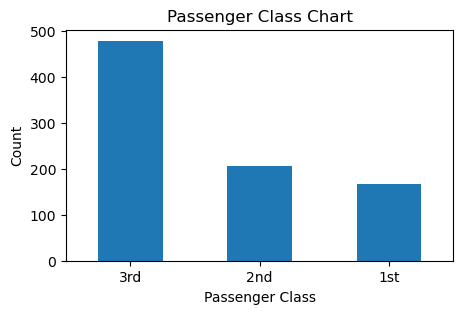

In [22]:
plt.figure(figsize=[5, 3])
df['pclass'].value_counts().plot(kind='bar');
plt.xticks(ticks=range(3), labels=['3rd', '2nd', '1st'], rotation=None);
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passenger Class Chart');

There are more people in the 3rd class than the 1st and 2nd classes combined.

Although this attribute is of integer data type, we will not be performing any kind of computation with it. However, we leave it as integer because Machine learning algorithms prefer it that way.

In [13]:
df['sex'].value_counts()

male      551
female    299
Name: sex, dtype: int64

In [ ]:
There are almost 